In [2]:
! wget  https://raw.githubusercontent.com/sejaldua/sql-olympics/main/data/athlete_events.csv

--2021-07-22 10:36:26--  https://raw.githubusercontent.com/sejaldua/sql-olympics/main/data/athlete_events.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36182972 (35M) [text/plain]
Saving to: ‘athlete_events.csv’

athlete_events.csv  100%[===================>]  34,51M   484KB/s    in 67s     

2021-07-22 10:37:36 (529 KB/s) - ‘athlete_events.csv’ saved [36182972/36182972]



In [12]:
import pandas as pd
import psycopg2 as psql
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [9]:
df_athlete_events = pd.read_csv('data/athlete_events.csv')
df_athlete_regions = pd.read_csv('data/noc_regions.csv')


In [19]:
# before store to postgres, columns name should in lowercase
df_athlete_events.columns = [ c.lower() for c in df_athlete_events.columns]
df_athlete_regions.columns = [ c.lower() for c in df_athlete_regions.columns]

In [3]:
postgres_address = 'localhost'
postgress_port = '5432'
postgres_username='postgres'
postgres_password ='******'
postgres_database ='postgres'
postgres = ('postgresql://{username}:{password}@{address}:{port}/{dbname}'.format(username= postgres_username, \
        password = postgres_password, address = postgres_address, port = postgress_port, dbname = postgres_database))
con=  create_engine(postgres)

In [21]:
df_athlete_events.to_sql('athlete_events', con = con, if_exists = 'replace', index=False)
  

In [22]:
df_athlete_regions.to_sql('athlete_region', con = con, if_exists = 'replace' , index= False)


# Data Exploration with PostgreSQL

## Connect to PostgresSQL

In [2]:
postgres_address = 'localhost'
postgress_port = '5432'
postgres_username='postgres'
postgres_password ='******'
postgres_database ='postgres'
postgres = ('postgresql://{username}:{password}@{address}:{port}/{dbname}'.format(username= postgres_username, \
        password = postgres_password, address = postgres_address, port = postgress_port, dbname = postgres_database))
con=  create_engine(postgres)

In [5]:
athlete_events = 'athlete_events'
athlete_region ='athlete_region'

In [23]:
import pandas.io.sql as sqlio

In [144]:
sql = 'SELECT * FROM athlete_events limit 1' 
master_df = pd.read_sql_query(sql,con)
master_df 

,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
0,31017,Kirstin Sheree Dwyer,F,27.0,173.0,66.0,Australia,AUS,2016 Summer,2016,Summer,Rio de Janeiro,Hockey,Hockey Women's Hockey,None


# Rapid FIRE  Q & A

In [31]:
# How many teams are there?
pd.read_sql_query('SELECT COUNT(DISTINCT noc) as jumlah_noc  from athlete_events ', con= con)

,jumlah_noc
0,230


In [35]:
#how many man and woman
pd.read_sql_query('SELECT sex , COUNT(*) FROM athlete_events GROUP BY sex ORDER BY 2 DESC', con)

,sex,count
0,M,196594
1,F,74522


In [39]:
#average age athlete 
pd.read_sql_query('SELECT ROUND(AVG (age)) Average_age FROM athlete_events', con)

,average_age
0,26.0


In [48]:
#  most country which  send athlete

pd.read_sql_query('SELECT   noc , COUNT(*) FROM athlete_events GROUP BY noc ORDER BY 2 DESC LIMIT 10;', con)

,noc,count
0,USA,18853
1,FRA,12758
2,GBR,12256
3,ITA,10715
4,GER,9830
5,CAN,9733
6,JPN,8444
7,SWE,8339
8,AUS,7638
9,HUN,6607


In [54]:
pd.read_sql_query('''SELECT COUNT(DISTINCT event) as number_event FROM athlete_events ''', con)

,number_event
0,765


In [62]:
pd.read_sql_query('''SELECT  year, count(event) number_event 
                     FROM athlete_events GROUP BY year ORDER BY number_event DESC''', con)

,year,number_event
0,1992,16413
1,1988,14676
2,2000,13821
3,1996,13780
4,2016,13688
5,2008,13602
6,2004,13443
7,2012,12920
8,1972,11959
9,1984,11588


In [91]:
# Who are the top 5 youngest athletes to ever compete in the Games?
pd.read_sql_query(""" SELECT DISTINCT name, age , sport, event,noc, games, city, medal FROM athlete_events
ORDER BY age
LIMIT 5
                         """, con)

,name,age,sport,event,noc,games,city,medal
0,Dimitrios Loundras,10.0,Gymnastics,"Gymnastics Men's Parallel Bars, Teams",GRE,1896 Summer,Athina,Bronze
1,Beatrice Hutiu,11.0,Figure Skating,Figure Skating Women's Singles,ROU,1968 Winter,Grenoble,None
2,Carlos Bienvenido Front Barrera,11.0,Rowing,Rowing Men's Coxed Eights,ESP,1992 Summer,Barcelona,None
3,Etsuko Inada,11.0,Figure Skating,Figure Skating Women's Singles,JPN,1936 Winter,Garmisch-Partenkirchen,None
4,Liana Vicens,11.0,Swimming,Swimming Women's 100 metres Breaststroke,PUR,1968 Summer,Mexico City,None


In [ ]:
SUM(CASE WHEN (medal = 'Gold' then 1 else 0  END))  AS  medal_gold,
SUM(CASE WHEN (medal = 'Silver' then 1 else 0 END ))  AS  medal_silver,
SUM(CASE WHEN (medal = 'Bronze' then 1 else 0 END ))  AS  medal_bronze,


In [146]:
pd.read_sql_query("""SELECT name, noc, count(medal) as total,
SUM(CASE WHEN medal = 'Gold' then 1 else 0  END)  AS  medal_gold,
SUM(CASE WHEN medal = 'Silver' then 1 else 0  END)  AS  medal_silver,
SUM(CASE WHEN medal = 'Bronze' then 1 else 0  END)  AS  medal_bronze,
 

DENSE_RANK ()OVER ( ORDER BY count(medal) DESC) FROM athlete_events
                            group by name, noc
                            LIMIT 10
 
                         """, con)

,name,noc,total,medal_gold,medal_silver,medal_bronze,dense_rank
0,"Michael Fred Phelps, II",USA,28,23,3,2,1
1,Larysa Semenivna Latynina (Diriy-),URS,18,9,5,4,2
2,Nikolay Yefimovich Andrianov,URS,15,7,5,3,3
3,Ole Einar Bjrndalen,NOR,13,8,4,1,4
4,Edoardo Mangiarotti,ITA,13,6,5,2,4
5,Takashi Ono,JPN,13,5,4,4,4
6,Borys Anfiyanovych Shakhlin,URS,13,7,4,2,4
7,Aleksey Yuryevich Nemov,RUS,12,4,2,6,5
8,"Dara Grace Torres (-Hoffman, -Minas)",USA,12,4,4,4,5
9,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",USA,12,8,3,1,5


In [119]:
# Who are the top 5 oldest athletes to ever compete in the Games?
pd.read_sql_query(""" SELECT DISTINCT name, age , sport, event,noc, games, city, medal 
FROM athlete_events
WHERE age IS NOT  NULL
ORDER BY age DESC
LIMIT 5
                         """, con)

,name,age,sport,event,noc,games,city,medal
0,John Quincy Adams Ward,97.0,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",USA,1928 Summer,Amsterdam,None
1,Winslow Homer,96.0,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",USA,1932 Summer,Los Angeles,None
2,Thomas Cowperthwait Eakins,88.0,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",USA,1932 Summer,Los Angeles,None
3,George Denholm Armour,84.0,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",GBR,1948 Summer,London,None
4,Louis Tauzin,81.0,Art Competitions,Art Competitions Mixed Sculpturing,FRA,1924 Summer,Paris,None


In [147]:
# Who are the top 5 oldest athletes to ever compete in the Games, excluding 'Art Competitions'?
# NOTE: art competitions were a part of the Olympics for a brief period of time (1912-1948)

pd.read_sql_query(""" SELECT DISTINCT name, age , sport,noc, city 
FROM athlete_events
WHERE age IS NOT NULL AND sport IN (SELECT DISTINCT sport FROM athlete_events WHERE year = 2016)
ORDER BY age DESC
LIMIT 5
                         """, con)


,name,age,sport,noc,city
0,Arthur von Pongracz de Szent-Mikls und vr,72.0,Equestrianism,AUT,Berlin
1,Oscar Gomer Swahn,72.0,Shooting,SWE,Antwerpen
2,Charles William Martin,71.0,Sailing,FRA,Paris
3,Hiroshi Hoketsu,71.0,Equestrianism,JPN,London
4,Thomas Foster Scott,71.0,Archery,USA,St. Louis


In [134]:
# Who are the top 5 heaviest athletes to ever compete in the Games?

pd.read_sql_query(""" SELECT DISTINCT name, weight , sport, event,noc, games, city 
FROM athlete_events
WHERE weight IS NOT NULL 
ORDER BY weight DESC
LIMIT 5
                         """, con)


,name,weight,sport,event,noc,games,city
0,"Ricardo Blas, Jr.",214.0,Judo,Judo Men's Heavyweight,GUM,2008 Summer,Beijing
1,"Ricardo Blas, Jr.",214.0,Judo,Judo Men's Heavyweight,GUM,2012 Summer,London
2,Aytami Ruano Vega,198.0,Judo,Judo Men's Heavyweight,ESP,2004 Summer,Athina
3,Marek Galiski,190.0,Wrestling,"Wrestling Men's Super-Heavyweight, Greco-Roman",POL,1980 Summer,Moskva
4,"Christopher J. ""Chris"" Taylor",182.0,Wrestling,"Wrestling Men's Super-Heavyweight, Freestyle",USA,1972 Summer,Munich


In [147]:
# Who are the top 5 lightest athletes to ever compete in the Games?
pd.read_sql_query(""" SELECT DISTINCT name,  (CAST(weight AS DECIMAL) * 2.2) AS  weight_lbs , sport ,noc, games, city,medal
FROM athlete_events
WHERE weight IS NOT NULL
ORDER BY weight_lbs 
LIMIT 5;



 
                         """, con)

,name,weight_lbs,sport,noc,games,city,medal
0,Choi Myong-Hui,55.0,Gymnastics,PRK,1980 Summer,Moskva,None
1,"Albert Ferdinand ""Al"" Zerhusen",61.6,Football,USA,1956 Summer,Melbourne,None
2,Anita Jokiel,61.6,Gymnastics,POL,1980 Summer,Moskva,None
3,Kana Yamawaki,61.6,Gymnastics,JPN,2000 Summer,Sydney,None
4,Wang Xin (Ruoxue-),61.6,Diving,CHN,2008 Summer,Beijing,Bronze


In [203]:
# Who are the top 5 tallest athletes to ever compete in the Games?
sql = """
SELECT DISTINCT name,height,
    CAST(TRUNC((CAST(height AS DECIMAL) * 0.394) / 12) AS INTEGER) AS height_ft,
    CAST((CAST(height AS DECIMAL) * 0.394) %% 12 AS INTEGER) AS height_in,
    sport, noc, medal FROM athlete_events
WHERE height IS NOT NULL
ORDER BY height_ft DESC, height_in DESC
LIMIT 5
"""
sqlio.read_sql_query(sql, con)

,name,height,height_ft,height_in,sport,noc,medal
0,Yao Ming,226.0,7,5,Basketball,CHN,None
1,Arvydas Romas Sabonis,223.0,7,4,Basketball,LTU,Bronze
2,Arvydas Romas Sabonis,223.0,7,4,Basketball,URS,Gold
3,Tommy Loren Burleson,223.0,7,4,Basketball,USA,Silver
4,Gunther Behnke,221.0,7,3,Basketball,GER,None


In [205]:
# Who are the top 5 shorttest athletes to ever compete in the Games?
sql = """
SELECT DISTINCT name,age, weight, height,
    CAST(TRUNC((CAST(height AS DECIMAL) * 0.394) / 12) AS INTEGER) AS height_ft,
    CAST((CAST(height AS DECIMAL) * 0.394) %% 12 AS INTEGER) AS height_in,
    sport, noc, medal FROM athlete_events
WHERE height IS NOT NULL
ORDER BY height_ft ASC, height_in ASC
LIMIT 5
"""
sqlio.read_sql_query(sql, con)

,name,age,weight,height,height_ft,height_in,sport,noc,medal
0,Helman Palije,21.0,74.0,128.0,4,2,Boxing,MAW,None
1,Lyton Levison Mphande,25.0,62.0,127.0,4,2,Boxing,MAW,None
2,Rosario Briones,15.0,42.0,127.0,4,2,Gymnastics,MEX,None
3,Boston Simbeye,28.0,67.0,130.0,4,3,Boxing,MAW,None
4,Salvador Miranda,22.0,51.0,130.0,4,3,Boxing,NCA,None


##  Visualizing athlete counts, aggregated in various ways

In [207]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

### Number of Athletes Competing over Time


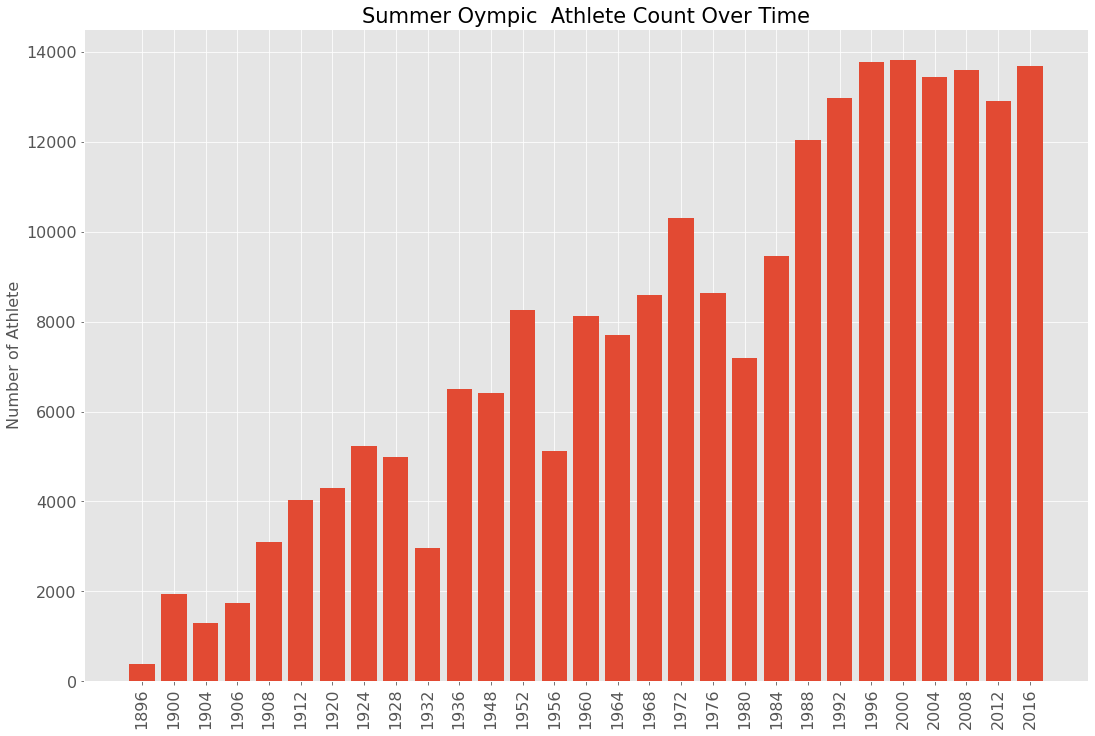

In [227]:
df = pd.read_sql_query("""
SELECT year,
COUNT (*) as num_athlete
FROM athlete_events
WHERE season = 'Summer'
GROUP BY year
""", con)
fig = plt.figure(figsize=(18,12))
plt.bar(df['year'].astype(str), df['num_athlete'])

plt.title("Summer Oympic  Athlete Count Over Time",fontsize = 21 )
plt.xticks(rotation = 90, fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylabel("Number of Athlete" , fontsize = 16)
fig.savefig("./figures/num_athlete_count_overtime.png")

## Number of Athletes per Sport


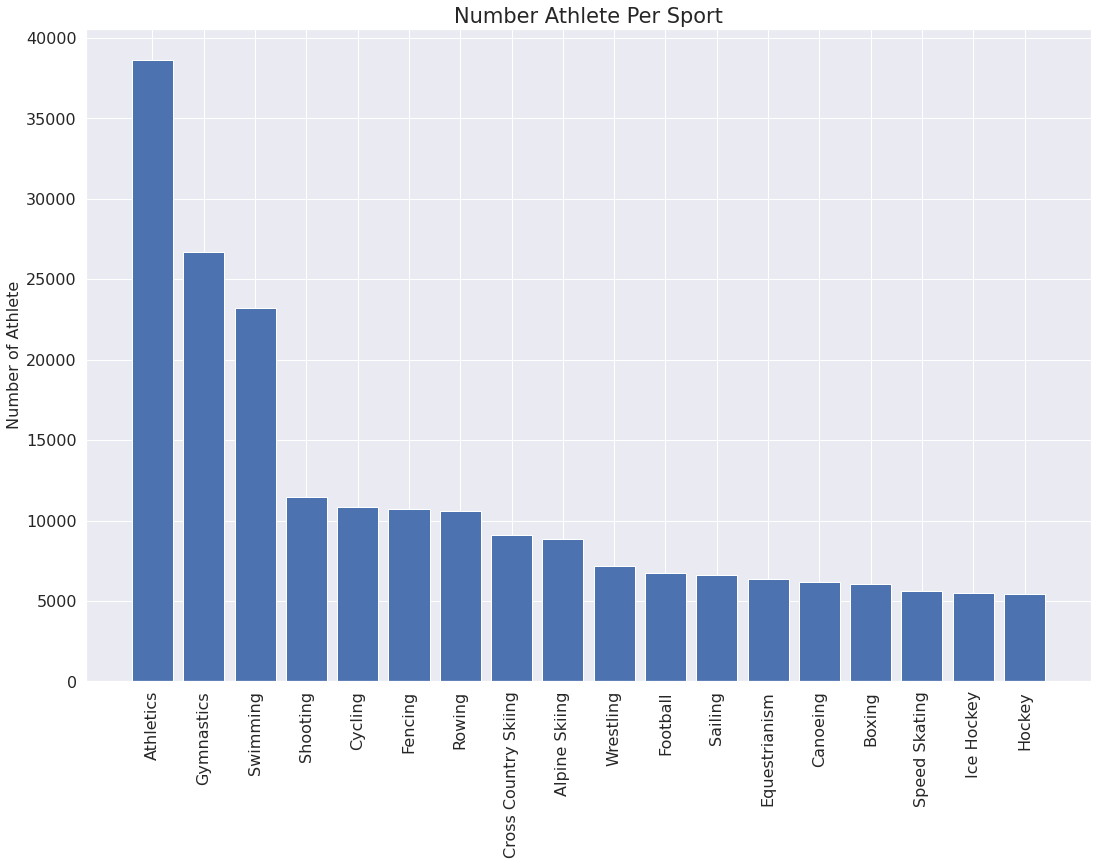

In [150]:
df = pd.read_sql_query("""
SELECT sport, count(*) as number_athlete
FROM athlete_events
GROUP BY sport
HAVING count(*) > 5000
ORDER BY 2 DESC;
""", con)
title = 'Number Athlete Per Sport'
name_file = title.lower()
name_file ="_".join(name_file.split(' '))

fig = plt.figure(figsize=(18,12))
plt.bar(df['sport'].astype(str), df['number_athlete'])

plt.title("{}".format(title),fontsize = 21 )
plt.xticks(rotation = 90, fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylabel("Number of Athlete" , fontsize = 16)
fig.savefig("./figures/{}.png".format(name_file))

## Number of Events per Sport¶


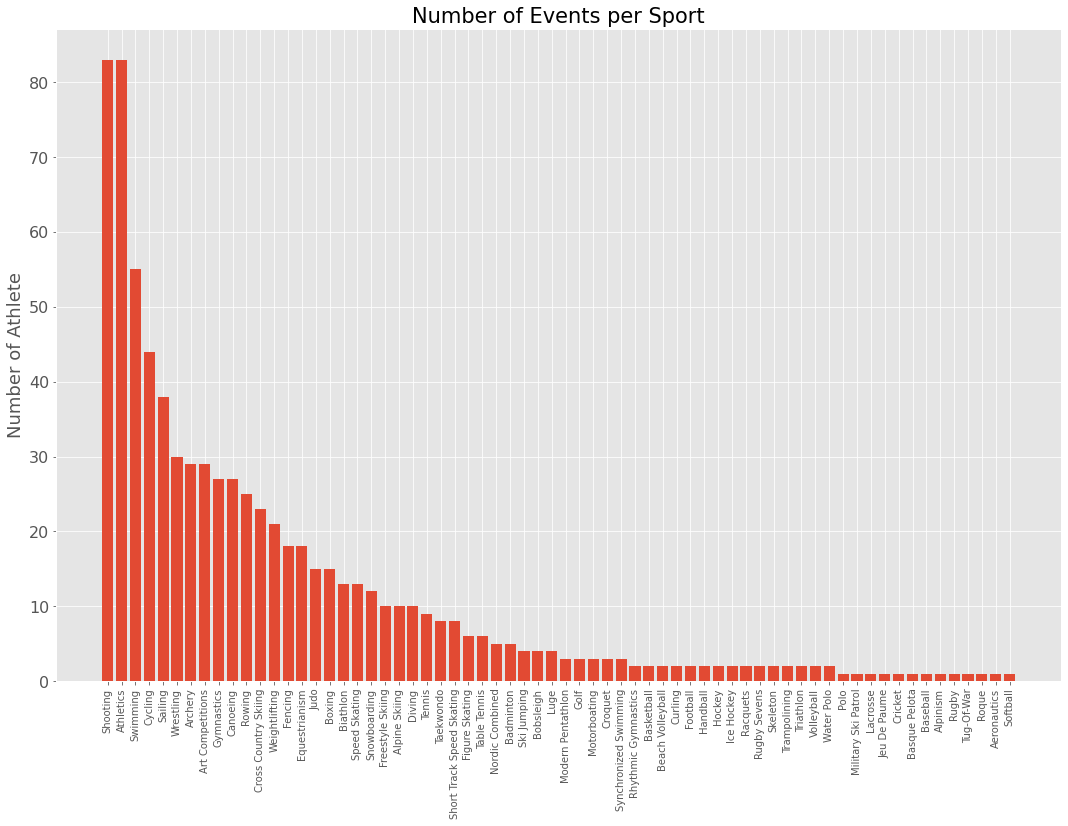

In [239]:
df = pd.read_sql_query("""
SELECT sport, count(distinct event) as number_event
FROM athlete_events
GROUP BY sport
ORDER BY 2 DESC;
""", con)
title = 'Number of Events per Sport'
name_file = title.lower()
name_file ="_".join(name.split(' '))

fig = plt.figure(figsize=(18,12))
plt.bar(df['sport'].astype(str), df['number_event'])

plt.title("{}".format(title),fontsize = 21 )
plt.xticks(rotation = 90 )
plt.yticks(fontsize = 16)
plt.ylabel("Number of Athlete" , fontsize = 18)
fig.savefig("./figures/{}.png".format(name_file))

## Number of Athletes per Region

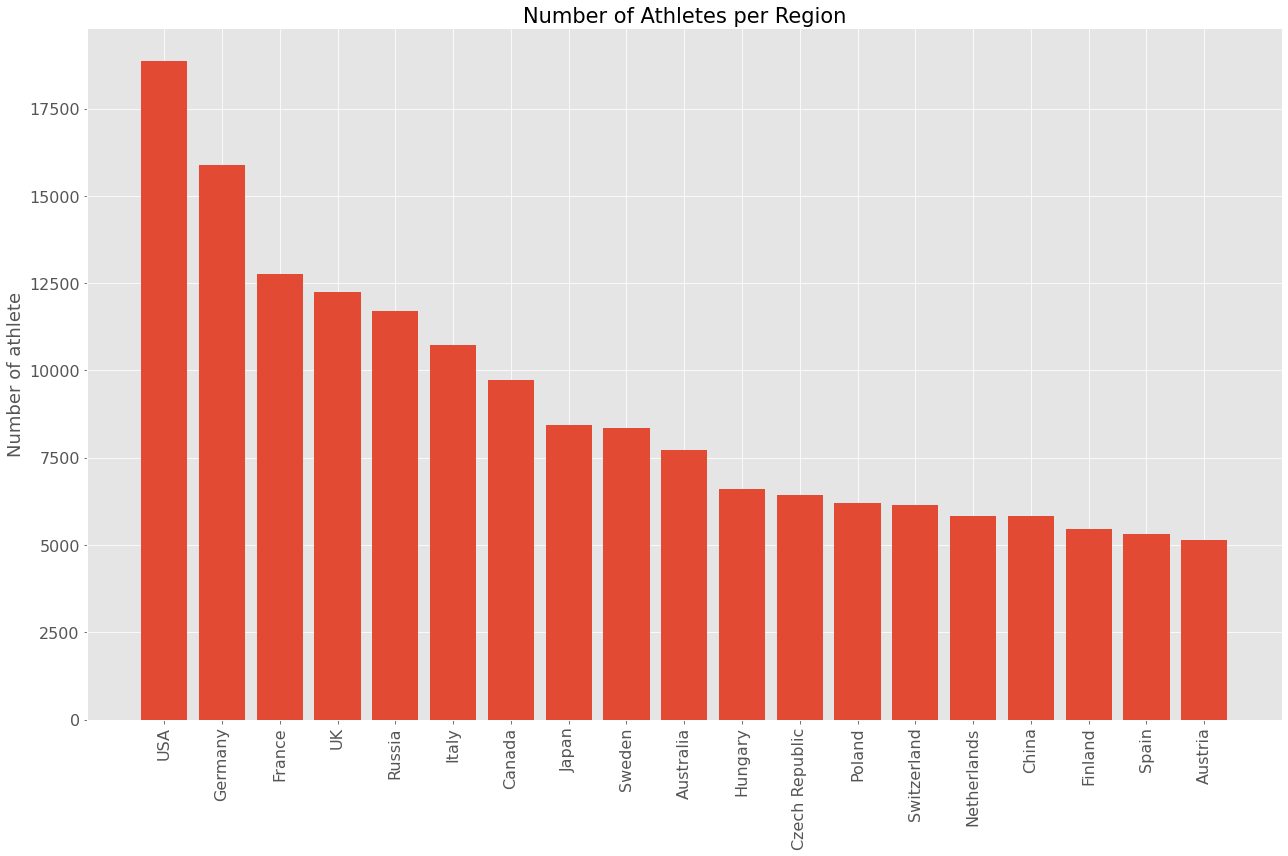

In [252]:
df = pd.read_sql_query(
"""
SELECT ar.region, count(at.*) as num_athlete
from athlete_events at
left join athlete_region ar
on  at.noc = ar.noc
group by region
having count(*) > 5000
order by num_athlete desc;
""", con
)

title = 'Number of Athletes per Region'
name_file = title.lower()
name_file ="_".join(name.split(' '))


fig = plt.figure(figsize=(18,12))
plt.bar(df['region'].astype(str), df['num_athlete'])

plt.title(title, fontsize = 21)
plt.ylabel('Number of athlete', fontsize = 18)
plt.xticks(rotation = 90, fontsize =16 )
plt.yticks(fontsize= 16)
plt.tight_layout() #  ad space  between   subplot to minimize overlaps 
fig.savefig("./figures/{}.png".format(name_file))
 

## Reigning lady ballers!

In [255]:
df = pd.read_sql_query(
"""
SELECT at.year,  ar.region as Gold
from athlete_events at
left join athlete_region ar
on  at.noc = ar.noc
WHERE sport  like 'Basket%%' and sex = 'F' and medal ='Gold'
group by year, region
order by year desc;
""", con
)
df
 

,year,gold
0,2016,USA
1,2012,USA
2,2008,USA
3,2004,USA
4,2000,USA
5,1996,USA
6,1992,Russia
7,1988,USA
8,1984,USA
9,1980,Russia


In [260]:
df = pd.read_sql_query(
"""
with 
silver_medal as (
SELECT at.year,  ar.region as Silver
from athlete_events at
left join athlete_region ar
on  at.noc = ar.noc
WHERE sport  like 'Basket%%' and sex = 'F' and medal ='Silver'
group by year, region
order by year desc),

gold_medal as (
SELECT at.year,  ar.region as Gold
from athlete_events at
left join athlete_region ar
on  at.noc = ar.noc
WHERE sport  like 'Basket%%' and sex = 'F' and medal ='Gold'
group by year, region
order by year desc)

select sm.year, gm.gold, sm.silver 
from  silver_medal sm, gold_medal gm
where gm.year = sm.year

""", con
)
df


,year,gold,silver
0,2016,USA,Spain
1,2012,USA,France
2,2008,USA,Australia
3,2004,USA,Australia
4,2000,USA,Australia
5,1996,USA,Brazil
6,1992,Russia,China
7,1988,USA,Serbia
8,1984,USA,South Korea
9,1980,Russia,Bulgaria


Sheesh. USA Women's Basketball team has not had a taste of defeat since 1992. That is 6 straight Gold medals!


In [268]:
df = pd.read_sql_query(
"""
 
SELECT name,  count(*) as medals
from athlete_events 
WHERE sport  like 'Basket%%' and sex = 'F' and medal ='Gold' and noc ='USA'
group by name
Having count(*) >=3
order by medals desc
 
""", con
)
df
 

,name,medals
0,Lisa Deshawn Leslie (-Lockwood),4
1,"Suzanne Brigit ""Sue"" Bird",4
2,Diana Lurena Taurasi,4
3,Tamika Devonne Catchings,4
4,Teresa Edwards,4
5,Sheryl Denice Swoopes,3
6,"Katherine May ""Katie"" Smith",3
7,Seimone Delicia Augustus,3
8,Dawn Michelle Staley,3
9,Sylvia Shaqueria Fowles,3


These queens have showed up 3+ times, bringing home the Gold and making Team USA proud!

## What about Team USA men's basketball?

In [269]:
df = pd.read_sql_query(
"""
with 
silver_medal as (
SELECT at.year,  ar.region as Silver
from athlete_events at
left join athlete_region ar
on  at.noc = ar.noc
WHERE sport  like 'Basket%%' and sex = 'M' and medal ='Silver'
group by year, region
order by year desc),

gold_medal as (
SELECT at.year,  ar.region as Gold
from athlete_events at
left join athlete_region ar
on  at.noc = ar.noc
WHERE sport  like 'Basket%%' and sex = 'M' and medal ='Gold'
group by year, region
order by year desc)

select sm.year, gm.gold, sm.silver 
from  silver_medal sm, gold_medal gm
where gm.year = sm.year

""", con
)
df
 

,year,gold,silver
0,2016,USA,Serbia
1,2012,USA,Spain
2,2008,USA,Spain
3,2004,Argentina,Italy
4,2000,USA,France
5,1996,USA,Serbia
6,1992,USA,Croatia
7,1988,Russia,Serbia
8,1984,USA,Spain
9,1980,Serbia,Italy


Looks like they have secured 6 gold medals over the last 7 Olympic Games! Pretty impressive. Top contenders include Serbia, Spain, France, and Croatia.



## Top 10 Team USA female gymnasts


In [276]:
df = pd.read_sql_query(
"""
 
SELECT name, count(*) as num_medal
from athlete_events at
 
WHERE medal is not null and  season = 'Summer' and sport  like 'Gym%%' and sex = 'F' and noc ='USA'
group by name
order by 2 DESC 
LIMIT 10

""", con
)
df
 

,name,num_medal
0,"Shannon Lee Miller (-Phillips, -Falconetti)",7
1,"Alexandra Rose ""Aly"" Raisman",6
2,Mary Lou Retton (-Kelley),5
3,Simone Arianne Biles,5
4,"Anastasiya Valeryevna ""Nastia"" Liukin",5
5,Dominique Margaux Dawes (-Thompson),4
6,Shawn Machel Johnson (-East),4
7,Julianne Lyn McNamara (-Zeile),3
8,"Gabrielle Christina Victoria ""Gabby"" Douglas",3
9,Carly Rae Patterson (-Caldwell),3


## Players to potentially look out for on the tennis court this year

In [321]:

sql = """
SELECT DISTINCT name, sex,ar.region  FROM athlete_events ae
LEFT JOIN  athlete_region ar  on ar.noc =  ae.noc
WHERE medal IS NOT NULL    and season = 'Summer' AND sport = 'Tennis' AND year = '2016'
ORDER BY region
"""
sqlio.read_sql_query(sql, con)

,name,sex,region
0,Juan Martn del Potro,M,Argentina
1,Barbora Strcov (-Zhlavov),F,Czech Republic
2,Lucie afov,F,Czech Republic
3,Lucie Hradeck,F,Czech Republic
4,Petra Kvitov,F,Czech Republic
5,Radek tpnek,M,Czech Republic
6,Angelique Kerber,F,Germany
7,Kei Nishikori,M,Japan
8,Monica Puig Marchn,F,Puerto Rico
9,Florin Mergea,M,Romania


... and don't forget about Naomi Osaka, playing for Japan in her first ever Olympic debut!



In [152]:
df = pd.read_sql_query(
    '''
    
   
    with 
    female_athlete as  (
    select  sport,  min( cast(height as integer)) as f_min, round(avg(cast(height as integer)),2) as f_avg , max(cast(height as integer)) as f_max
    from athlete_events
    where sex ='F' and height is not null and weight is not null and sport in (
    select sport from athlete_events  group by sport having count(*) > 2000
    )
    group by sport
    order by f_avg),
    
     male_athlete as (
    select  sport,  min( cast(height as integer)) as m_min, round(avg(cast(height as integer)),2) as m_avg , max(cast(height as integer))
   as m_max from athlete_events
    where sex ='M' and height is not null and weight is not null and sport in (
    select sport from athlete_events  group by sport having count(*) > 2000
    )
    group by sport
    order by m_avg)
    
    select  fa.sport, f_min, f_avg, f_max, m_min, m_avg, m_max,(f_avg + m_avg) as avg_sum
    from female_athlete fa
    inner join  male_athlete ma  on ma.sport = fa.sport
order by avg_sum asc

    
    
    ''', con)
df

,sport,f_min,f_avg,f_max,m_min,m_avg,m_max,avg_sum
0,Gymnastics,127,156.16,179,150,167.61,188,323.77
1,Weightlifting,141,160.47,190,140,169.15,205,329.62
2,Diving,137,161.28,178,148,171.65,188,332.93
3,Figure Skating,137,160.55,180,156,176.04,193,336.59
4,Wrestling,147,163.87,180,137,172.91,214,336.78
5,Ski Jumping,152,164.31,175,156,176.65,200,340.96
6,Shooting,146,164.93,190,132,176.07,213,341.00
7,Boxing,150,168.68,184,127,172.84,208,341.52
8,Hockey,138,166.21,190,150,176.86,200,343.07
9,Judo,143,166.21,193,145,177.48,213,343.69


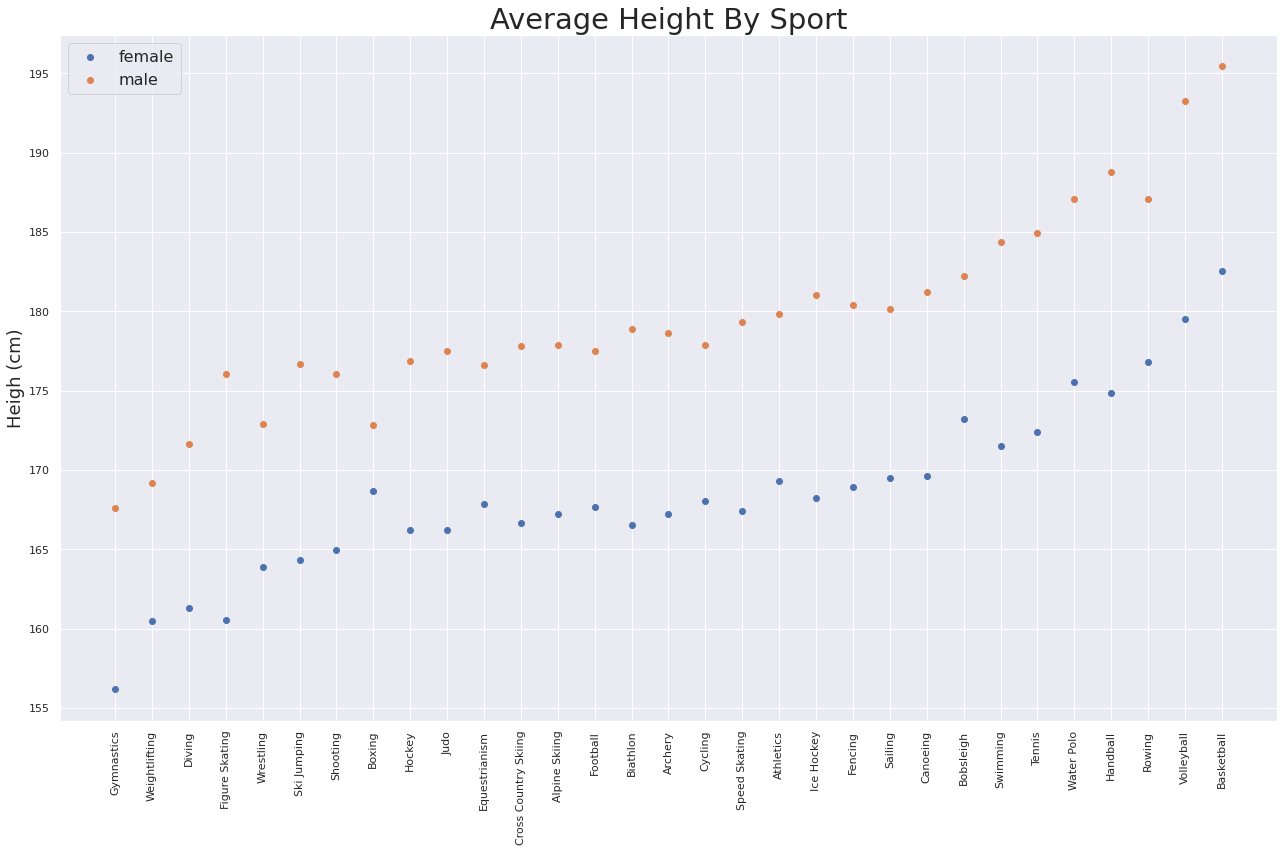

In [154]:

plt.figure (figsize=(18,12))
plt.scatter(df['sport'], df['f_avg'], label = 'female')
plt.scatter(df['sport'], df['m_avg'], label = 'male')
plt.xticks(rotation =90)
plt.title("Average Height By Sport", fontsize =29)
plt.ylabel('Heigh (cm)', fontsize= 18)

plt.legend(fontsize =  16)
plt.tight_layout()
fig.savefig("./figures/avg_height_by_sport.png")


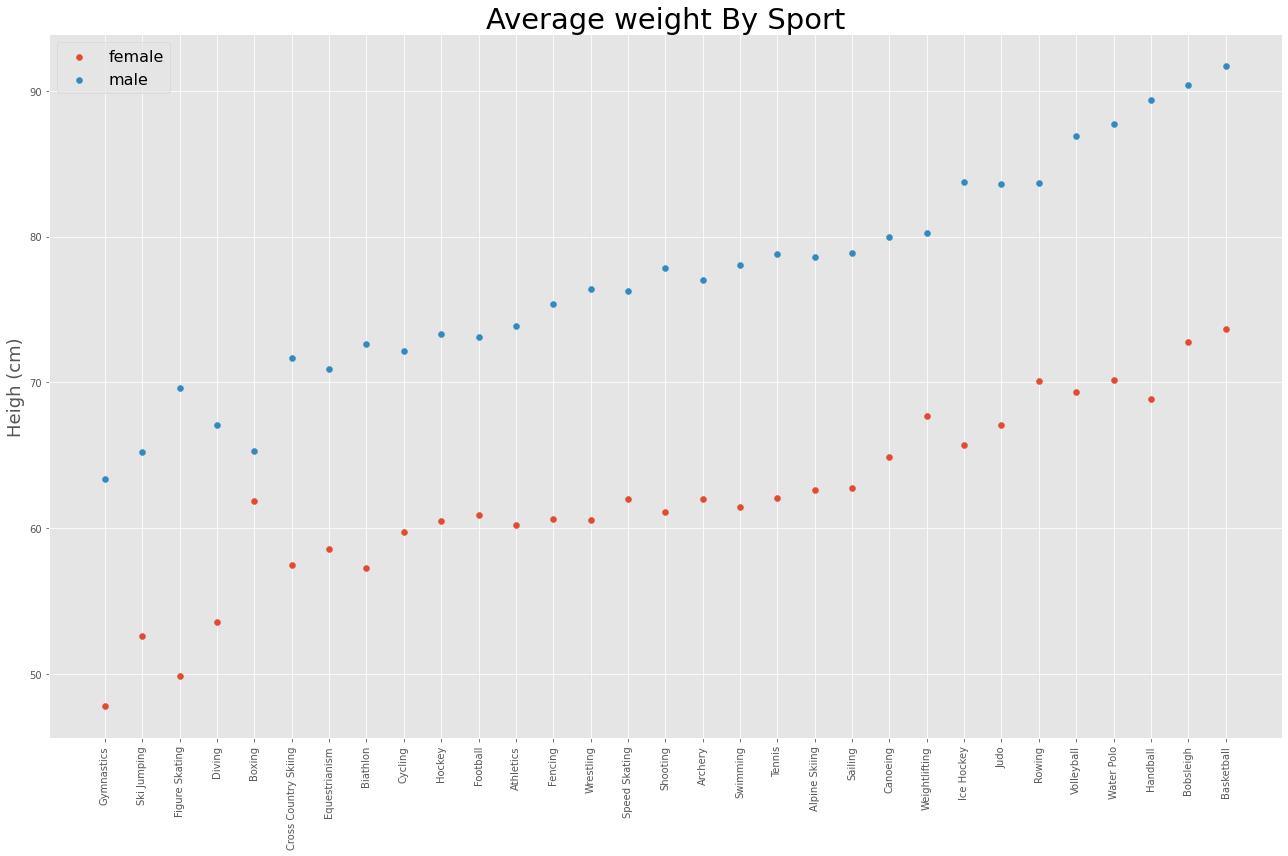

In [352]:
df = pd.read_sql_query(
    '''
    
   
    with 
    female_athlete as  (
    select  sport,  min( cast(weight as integer)) as f_min, round(avg(cast(weight as integer)),2) as f_avg , max(cast(weight as integer)) as f_max
    from athlete_events
    where sex ='F' and weight is not null and weight is not null and sport in (
    select sport from athlete_events  group by sport having count(*) > 2000
    )
    group by sport
    order by f_avg),
    
     male_athlete as (
    select  sport,  min( cast(weight as integer)) as m_min, round(avg(cast(weight as integer)),2) as m_avg , max(cast(weight as integer))
   as m_max from athlete_events
    where sex ='M' and weight is not null and weight is not null and sport in (
    select sport from athlete_events  group by sport having count(*) > 2000
    )
    group by sport
    order by m_avg)
    
    select  fa.sport, f_min, f_avg, f_max, m_min, m_avg, m_max,(f_avg + m_avg) as avg_sum
    from female_athlete fa
    inner join  male_athlete ma  on ma.sport = fa.sport
order by avg_sum asc

    
    
    ''', con)
df
plt.figure (figsize=(18,12))
plt.scatter(df['sport'], df['f_avg'], label = 'female')
plt.scatter(df['sport'], df['m_avg'], label = 'male')
plt.xticks(rotation =90)
plt.title("Average weight By Sport", fontsize =29)
plt.ylabel('Heigh (cm)', fontsize= 18)

plt.legend(fontsize =  16)
plt.tight_layout()
fig.savefig('./figures/avg_weight_by_sport.png')


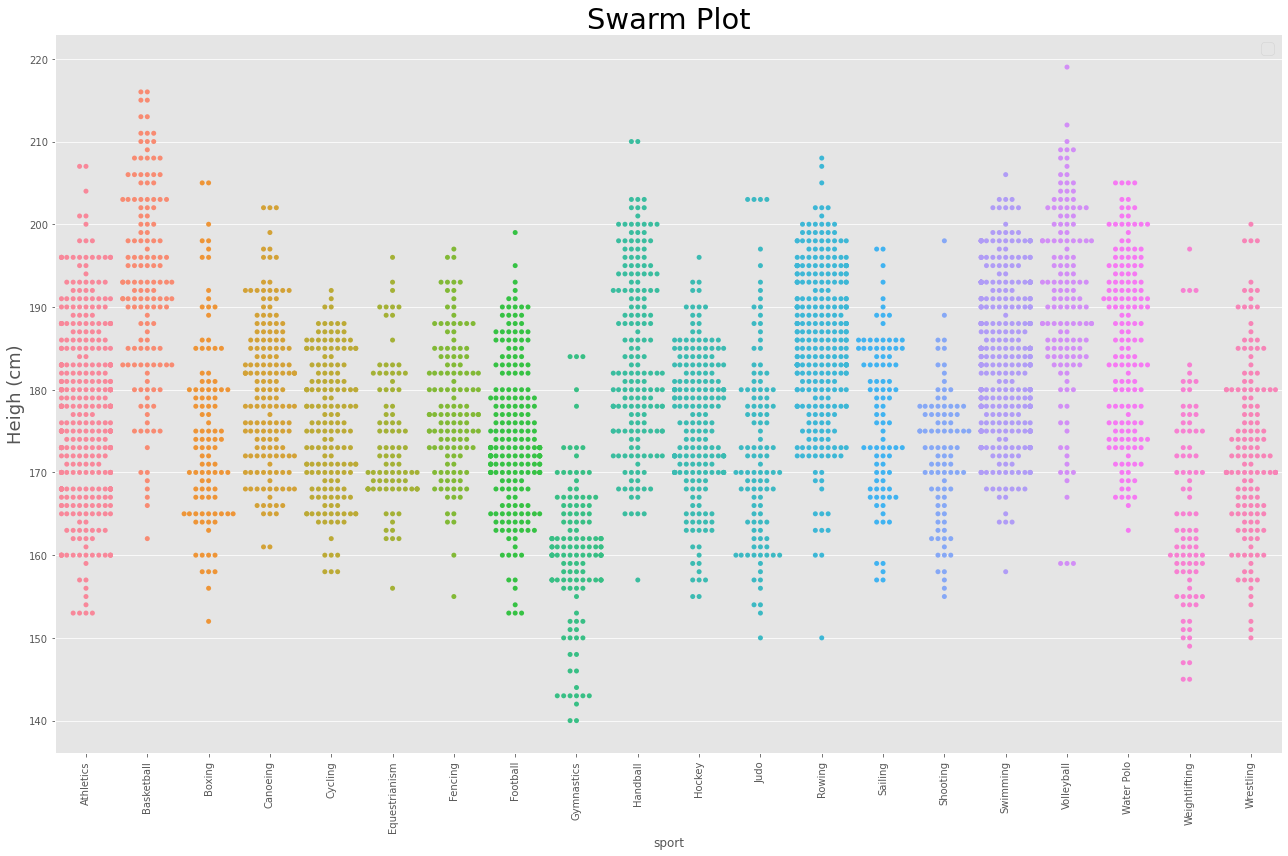

In [361]:
df = pd.read_sql_query(
"""
select sport, cast( height as integer)
from athlete_events 
where sport in (
select sport from athlete_events
group by sport
having count (*) > 3000
)
and height is not null and medal is not null and  season = 'Summer' and year >= '2012'
order by  sport 
""", con
)

fig, ax = plt.subplots (figsize=(18,12))
sns.swarmplot(df['sport'], df['height'])
plt.xticks(rotation =90)
plt.title("Swarm Plot", fontsize =29)
plt.ylabel('Heigh (cm)', fontsize= 18)

plt.legend(fontsize =  16)
plt.tight_layout()
fig.savefig('./figures/height_swarmplot.png')


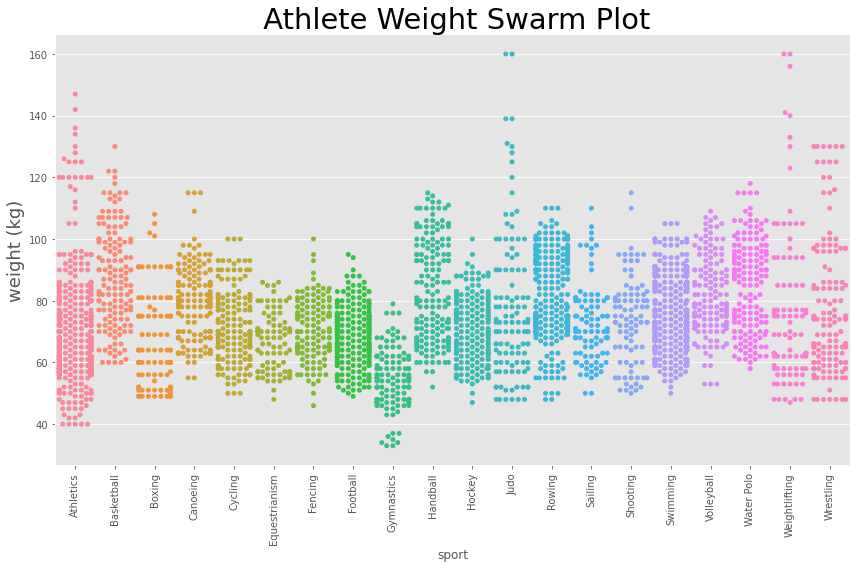

In [365]:
df = pd.read_sql_query(
"""
select sport, cast( weight as integer)
from athlete_events 
where sport in (
select sport from athlete_events
group by sport
having count (*) > 3000
)
and weight is not null and medal is not null and  season = 'Summer' and year >= '2012'
order by  sport 
""", con
)

fig, ax = plt.subplots (figsize=(12,8))
sns.swarmplot(df['sport'], df['weight'])
plt.xticks(rotation =90)
plt.title(" Athlete Weight Swarm Plot", fontsize =29)
plt.ylabel('weight (kg)', fontsize= 18)

plt.tight_layout()
fig.savefig('./figures/weight_swarmplot.png')


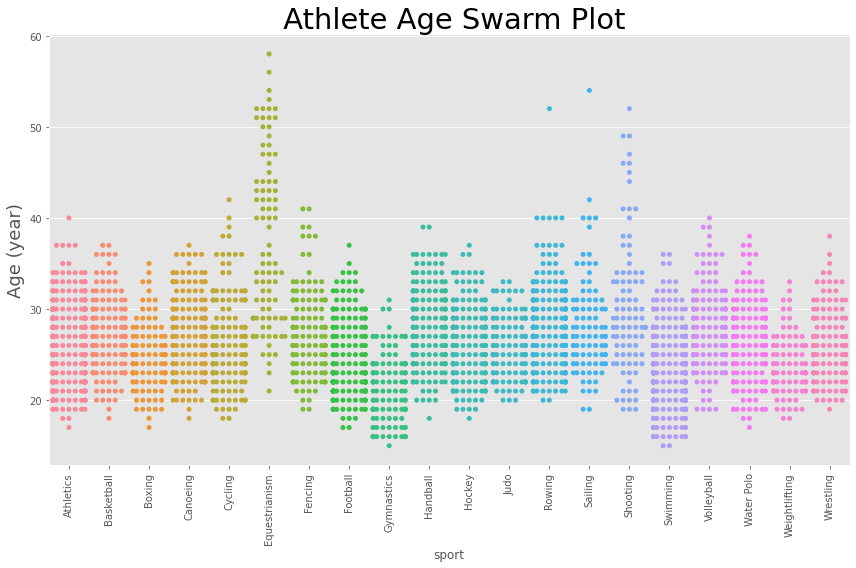

In [366]:
df = pd.read_sql_query(
"""
select sport, cast( age as integer)
from athlete_events 
where sport in (
select sport from athlete_events
group by sport
having count (*) > 3000
)
and age is not null and medal is not null and  season = 'Summer' and year >= '2012'
order by  sport 
""", con
)

fig, ax = plt.subplots (figsize=(12,8))
sns.swarmplot(df['sport'], df['age'])
plt.xticks(rotation =90)
plt.title(" Athlete Age Swarm Plot", fontsize =29)
plt.ylabel('Age (year)', fontsize= 18)

plt.tight_layout()
fig.savefig('./figures/Age_swarmplot.png')


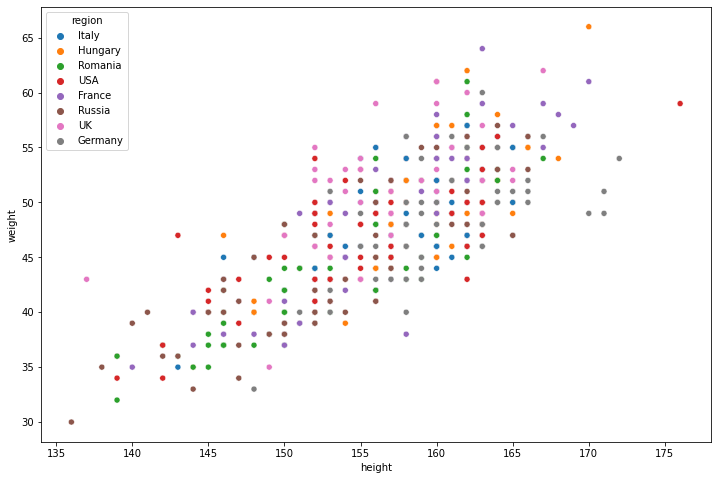

In [13]:
sql = """
SELECT DISTINCT name, CAST(height AS INTEGER), CAST(weight AS DECIMAL), region
FROM athlete_events
LEFT JOIN athlete_region
ON athlete_events.noc = athlete_region.noc
WHERE sport = 'Gymnastics' AND sex = 'F' AND height IS NOT NULL   AND weight IS NOT NULL
AND region IN
(
    SELECT region FROM athlete_events
    LEFT JOIN athlete_region
    ON athlete_events.noc = athlete_region.noc
    WHERE sport = 'Gymnastics' AND sex = 'F'
    GROUP BY region
    ORDER BY COUNT(DISTINCT name) DESC
    LIMIT 8
)
"""
df = pd.read_sql_query(sql, con)
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(data=df, x='height', y='weight', hue='region')
fig.savefig('./figures/gymnastics_athletic_build_by_country_scatterplot.png')

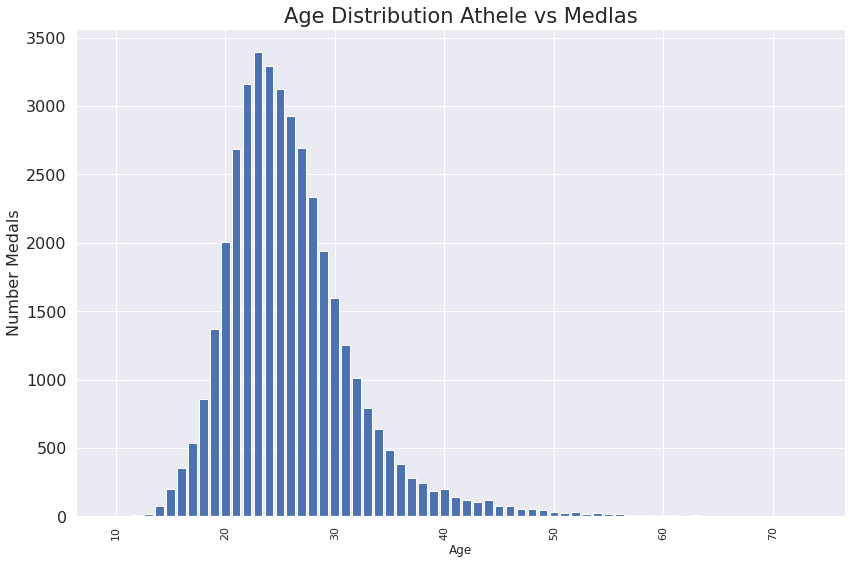

In [143]:
sns.set()

# Age distribution

df = pd.read_sql_query(
"""
SELECT age,count(medal) as medal
FROM  athlete_events
where age is not null and medal is not null
group by age
""", con)

fig = plt.figure(figsize = (12,8))

plt.bar(df['age'], df['medal'])
plt.xticks(rotation = 90)
plt.yticks(fontsize = 16)
plt.ylabel("Number Medals",fontsize = 16)
plt.title("Age Distribution Athele vs Medlas", fontsize = 21)
plt.xlabel("Age")
plt.tight_layout()
fig.savefig("./figures/age_distribution_of_medalists.png")


In [32]:
# Top 10 most decorated olympians, ranked by weighted sum of medals earned

df = pd.read_sql_query(
"""
SELECT name,sex, noc, sport,
sum (case  when medal = 'Gold' then 3  
     when medal = 'Silver' THEN 2  
     when medal = 'Bronze' THEN 1 else  
     0 end) as total_medal
FROM  athlete_events
 group by name, sex, noc, sport
 ORDER BY  total_medal DESC
 limit 10
""", con)
df

,name,sex,noc,sport,total_medal
0,"Michael Fred Phelps, II",M,USA,Swimming,77
1,Larysa Semenivna Latynina (Diriy-),F,URS,Gymnastics,41
2,Nikolay Yefimovich Andrianov,M,URS,Gymnastics,34
3,Paavo Johannes Nurmi,M,FIN,Athletics,33
4,Ole Einar Bjrndalen,M,NOR,Biathlon,33
5,Sawao Kato,M,JPN,Gymnastics,31
6,Borys Anfiyanovych Shakhlin,M,URS,Gymnastics,31
7,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",F,USA,Swimming,31
8,Edoardo Mangiarotti,M,ITA,Fencing,30
9,Mark Andrew Spitz,M,USA,Swimming,30


In [88]:
# Top 10 most decorated olympians, ranked by weighted sum of medals earned

df = pd.read_sql_query(
"""
SELECT name,sex, noc, sport,
sum (case  when medal = 'Gold' then 1 
     when medal = 'Silver' THEN 1  
     when medal = 'Bronze' THEN 1 else  
     0 end) as medal
FROM  athlete_events
 group by name, sex, noc, sport
 ORDER BY  medal DESC
 limit 10
""", con)
df



,name,sex,noc,sport,medal
0,"Michael Fred Phelps, II",M,USA,Swimming,28
1,Larysa Semenivna Latynina (Diriy-),F,URS,Gymnastics,18
2,Nikolay Yefimovich Andrianov,M,URS,Gymnastics,15
3,Edoardo Mangiarotti,M,ITA,Fencing,13
4,Takashi Ono,M,JPN,Gymnastics,13
5,Borys Anfiyanovych Shakhlin,M,URS,Gymnastics,13
6,Ole Einar Bjrndalen,M,NOR,Biathlon,13
7,Natalie Anne Coughlin (-Hall),F,USA,Swimming,12
8,"Dara Grace Torres (-Hoffman, -Minas)",F,USA,Swimming,12
9,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",F,USA,Swimming,12


In [92]:
# Top 10 most decorated male olympians, in order of most gold medals
pd.read_sql_query("""SELECT name, count(medal) as total,
SUM(CASE WHEN medal = 'Gold' then 1 else 0  END)  AS  medal_gold,
SUM(CASE WHEN medal = 'Silver' then 1 else 0  END)  AS  medal_silver,
SUM(CASE WHEN medal = 'Bronze' then 1 else 0  END)  AS  medal_bronze,
 

DENSE_RANK ()OVER ( ORDER BY count(medal) DESC) as Ranking  FROM athlete_events
                            where sex = 'M'

                            group by name
                            LIMIT 10
 
                         """, con)

,name,total,medal_gold,medal_silver,medal_bronze,ranking
0,"Michael Fred Phelps, II",28,23,3,2,1
1,Nikolay Yefimovich Andrianov,15,7,5,3,2
2,Ole Einar Bjrndalen,13,8,4,1,3
3,Takashi Ono,13,5,4,4,3
4,Borys Anfiyanovych Shakhlin,13,7,4,2,3
5,Edoardo Mangiarotti,13,6,5,2,3
6,Aleksey Yuryevich Nemov,12,4,2,6,4
7,Sawao Kato,12,8,3,1,4
8,Ryan Steven Lochte,12,6,3,3,4
9,Paavo Johannes Nurmi,12,9,3,0,4


In [93]:
# Top 10 most decorated female olympians, in order of most gold medals
pd.read_sql_query("""SELECT name, count(medal) as total,
SUM(CASE WHEN medal = 'Gold' then 1 else 0  END)  AS  medal_gold,
SUM(CASE WHEN medal = 'Silver' then 1 else 0  END)  AS  medal_silver,
SUM(CASE WHEN medal = 'Bronze' then 1 else 0  END)  AS  medal_bronze,
 

DENSE_RANK ()OVER ( ORDER BY count(medal) DESC) as Ranking  FROM athlete_events
                            where sex = 'F'

                            group by name
                            LIMIT 10
 
                         """, con)

,name,total,medal_gold,medal_silver,medal_bronze,ranking
0,Larysa Semenivna Latynina (Diriy-),18,9,5,4,1
1,Natalie Anne Coughlin (-Hall),12,3,4,5,2
2,"Dara Grace Torres (-Hoffman, -Minas)",12,4,4,4,2
3,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",12,8,3,1,2
4,Birgit Fischer-Schmidt,12,8,4,0,2
5,Vra slavsk (-Odloilov),11,7,4,0,3
6,Yang Yang,10,2,6,2,4
7,Stefania Belmondo,10,2,3,5,4
8,Isabelle Regina Werth,10,6,4,0,4
9,Marit Bjrgen,10,6,3,1,4


In [105]:
# OLYMPIC DOMINANCE (country <--> sport), in terms of weighted sum of medals earned

pd.read_sql_query("""SELECT ar.region, sport, count(medal) as total,
SUM(CASE WHEN medal = 'Gold' then 1 else 0  END)  AS  medal_gold,
SUM(CASE WHEN medal = 'Silver' then 1 else 0  END)  AS  medal_silver,
SUM(CASE WHEN medal = 'Bronze' then 1 else 0  END)  AS  medal_bronze,
 

DENSE_RANK ()OVER ( ORDER BY count(medal) DESC) as Ranking  FROM athlete_events ae
                            left join athlete_region ar on ar.noc = ae.noc

                            group by sport, region
                            order by  total DESC
                            limit 10
 
                         """, con)

,region,sport,total,medal_gold,medal_silver,medal_bronze,ranking
0,USA,Athletics,1080,542,317,221,1
1,USA,Swimming,1078,649,254,175,2
2,Germany,Rowing,471,272,92,107,3
3,Australia,Swimming,412,123,165,124,4
4,Russia,Gymnastics,399,176,142,81,5
5,USA,Rowing,375,186,101,88,6
6,Russia,Athletics,374,124,129,121,7
7,Germany,Swimming,367,82,137,148,8
8,Germany,Athletics,365,90,132,143,9
9,Italy,Fencing,359,151,136,72,10


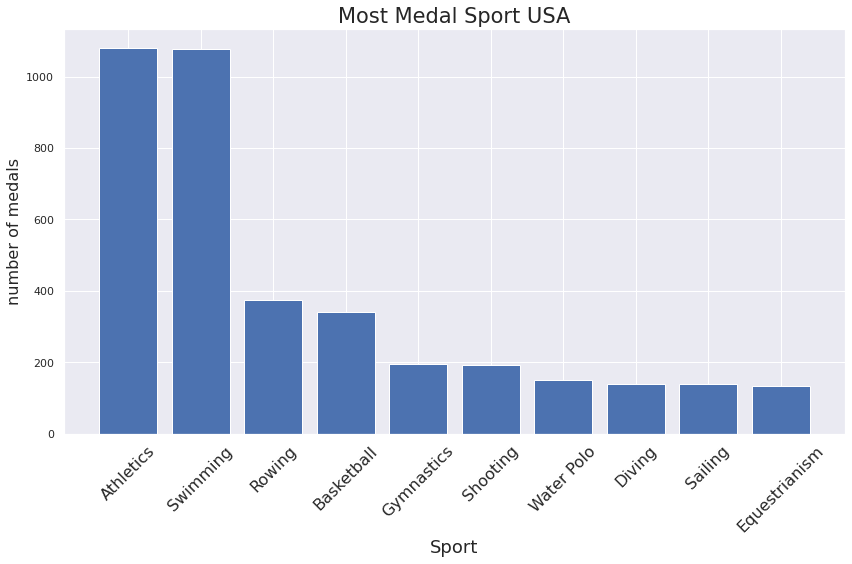

In [135]:
   # OLYMPIC DOMINANCE (country <--> sport), in terms of weighted sum of medals earned

df = pd.read_sql_query("""SELECT  sport, count(medal) as total,
SUM(CASE WHEN medal = 'Gold' then 1 else 0  END)  AS  medal_gold,
SUM(CASE WHEN medal = 'Silver' then 1 else 0  END)  AS  medal_silver,
SUM(CASE WHEN medal = 'Bronze' then 1 else 0  END)  AS  medal_bronze,
 

DENSE_RANK ()OVER ( ORDER BY count(medal) DESC) as Ranking  FROM athlete_events  
                            where noc ='USA' and season ='Summer'
                            group by sport
                            order by  total DESC
                            limit 10
 
                         """, con)

df
fig = plt.figure(figsize=(12,8))
plt.bar(df['sport'], df['total'])

plt.title('Most Medal Sport USA', fontsize = 21)
plt.ylabel('number of medals', fontsize = 16)
plt.xlabel('Sport',fontsize =18)
plt.xticks(rotation = 45, fontsize =16)
plt.tight_layout()
fig.savefig("./figures/most_medal_usa.png")

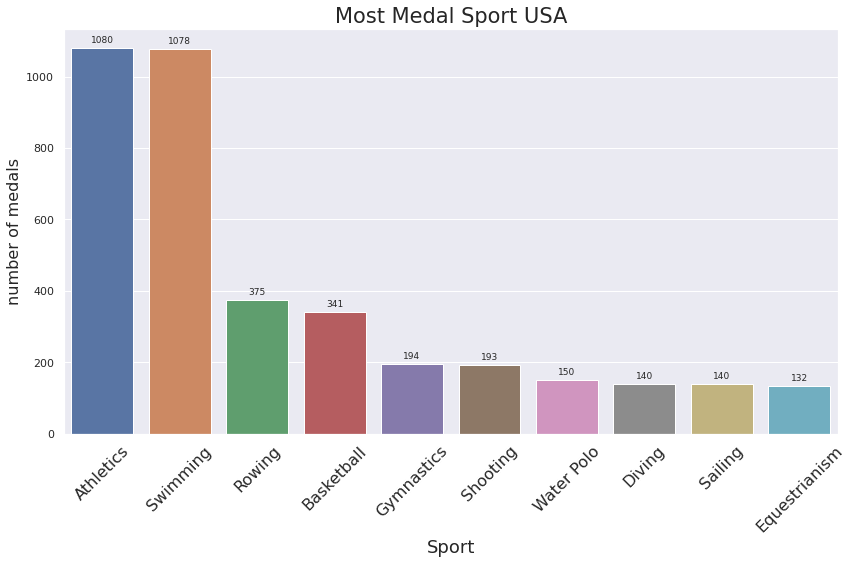

In [141]:
sns.set()



# Defining the plot size
plt.figure(figsize=(12, 8))
  
# Defining the values for x-axis, y-axis
# and from which datafarme the values are to be picked
plots = sns.barplot(x="sport", y="total", data=df)
  
# Iterrating over the bars one-by-one
for bar in plots.patches:
    
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(int(bar.get_height())), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=9, xytext=(0, 8),
                   textcoords='offset points')
  
plt.xticks(rotation = 45, fontsize =15)
plt.title('Most Medal Sport USA', fontsize = 21)
plt.ylabel('number of medals', fontsize = 16)
plt.xlabel('Sport',fontsize =18)
plt.xticks(rotation = 45, fontsize =16)
plt.tight_layout()
fig.savefig("./figures/most_medal_usa.png")
plt.tight_layout()
plt.show()